In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import plotly.graph_objects as go
from plotly import offline as pyoff
RANDOM_STATE = 42
from datetime import date
import calendar
import datetime as dt
from datetime import datetime

In [2]:
df = pd.read_csv('df_banc_rev.csv')

In [3]:
ventas =df[df['entry_date']>='2019-03-01']

In [4]:
ventas

,Unnamed: 0,pk_cid,pk_partition,entry_date,active_customer,short_term_deposit,loans,mortgage,funds,securities,...,revenue_mortgage,revenue_pension_plan,revenue_securities,revenue_credit_card,revenue_debit_card,revenue_short_term_deposit,revenue_payroll,revenue_payroll_account,revenue_total,unidades_vendidas_total
975,5523478,35843,2019-05-28,2019-05-28,1.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,10.0,1.0
1232,4876057,41264,2019-03-28,2019-03-29,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,10.0,1.0
1233,5132992,41264,2019-04-28,2019-03-29,1.0,0,0,0,0,0,...,0,40.0,0,0,60,0,0.0,10,110.0,3.0
1234,5523413,41264,2019-05-28,2019-03-29,1.0,0,0,0,0,0,...,0,0.0,0,0,60,0,0.0,10,70.0,2.0
1245,5523414,42865,2019-05-28,2019-04-04,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956506,5679916,1553685,2019-05-28,2019-05-31,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0.0,0.0
5956507,5679915,1553686,2019-05-28,2019-05-31,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0.0,0.0
5956508,5679914,1553687,2019-05-28,2019-05-31,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0.0,0.0
5956509,5679913,1553688,2019-05-28,2019-05-31,0.0,0,0,0,0,0,...,0,0.0,0,0,0,0,0.0,0,0.0,0.0


In [5]:
ventas_ultimo_trimestre= ventas.groupby(by=['entry_date'],as_index=False)["revenue_total"].count()


In [6]:
ventas_ultimo_trimestre['revenue_total'].sum()

27419

In [64]:
###Para obtener el listado de los 10000 mejores clientes, a quienes enviar el email, vamos a seguir el criterio ,segun
###el RFM Score, que a continuación vamos a calcular.


In [8]:
df_top = df.groupby(by=['pk_cid','entry_date'],as_index=False)["unidades_vendidas_total"].count()

In [9]:
df_top

,pk_cid,entry_date,unidades_vendidas_total
0,15891,2018-07-28,2
1,16063,2018-11-19,7
2,16203,2018-12-23,6
3,16502,2018-09-30,9
4,17457,2017-09-16,17
...,...,...,...
454901,1553685,2019-05-31,1
454902,1553686,2019-05-31,1
454903,1553687,2019-05-31,1
454904,1553688,2019-05-31,1


In [10]:
df_top = df_top[df_top['unidades_vendidas_total']==17]

In [11]:
df_top.describe()

,pk_cid,unidades_vendidas_total
count,2.328910e+05,232891.0
mean,1.178941e+06,17.0
std,1.261654e+05,0.0
min,1.745700e+04,17.0
25%,1.086818e+06,17.0
50%,1.180961e+06,17.0
75%,1.280713e+06,17.0
max,1.379128e+06,17.0


In [12]:
NOW = dt.datetime(2019,5,28)

In [13]:
df['entry_date'] = pd.to_datetime(df['entry_date'])

In [14]:
df['pk_partition'] = pd.to_datetime(df['pk_partition'])

In [15]:
df_17m = df[(df.entry_date.dt.date < date(2019,5,28)) & (df.entry_date.dt.date >= date(2018,1,1))].reset_index(drop=True)

In [16]:
df_frequency = df_17m.groupby('pk_cid').entry_date.count().reset_index()
df_frequency.columns = ['pk_cid','Frequency']

In [17]:
df = pd.merge(df,df_frequency,on='pk_cid',how='right')

In [18]:
df_17m1 = df[(df.pk_partition.dt.date < date(2019,5,28)) & (df.pk_partition.dt.date >= date(2018,1,1))].reset_index(drop=True)

In [19]:
df_pk_partition = df_17m1.groupby('pk_cid').pk_partition.count().reset_index()
df_pk_partition.columns = ['pk_cid','Ingesta']

In [20]:
df = pd.merge(df,df_pk_partition,on='pk_cid',how='right')

In [21]:
df

,Unnamed: 0,pk_cid,pk_partition,entry_date,active_customer,short_term_deposit,loans,mortgage,funds,securities,...,revenue_securities,revenue_credit_card,revenue_debit_card,revenue_short_term_deposit,revenue_payroll,revenue_payroll_account,revenue_total,unidades_vendidas_total,Frequency,Ingesta
0,2168122,15891,2018-08-28,2018-07-28,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,2,2
1,1479563,15891,2018-07-28,2018-07-28,1.0,0,0,0,0,0,...,0,0,0,0,0.0,0,10.0,1.0,2,2
2,5134317,16063,2019-04-28,2018-11-19,1.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,7,6
3,2962973,16063,2018-11-28,2018-11-19,1.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,7,6
4,4028169,16063,2019-01-28,2018-11-19,1.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246323,5100676,1548204,2019-04-28,2019-04-29,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,2,1
1246324,5682989,1548206,2019-05-28,2019-04-29,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,2,1
1246325,5100677,1548206,2019-04-28,2019-04-29,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,2,1
1246326,5100678,1548207,2019-04-28,2019-04-29,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,2,1


In [22]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Unnamed: 0,2168122,1479563,5134317,2962973,4028169,5523397,4876040,3628236,4480637,5134321,5523396,3628238,4028170,4876039,4480636,4876038,3628237,2171490,5523395,5134320
pk_cid,15891,15891,16063,16063,16063,16063,16063,16063,16063,16203,16203,16203,16203,16203,16203,16502,16502,16502,16502,16502
pk_partition,2018-08-28 00:00:00,2018-07-28 00:00:00,2019-04-28 00:00:00,2018-11-28 00:00:00,2019-01-28 00:00:00,2019-05-28 00:00:00,2019-03-28 00:00:00,2018-12-28 00:00:00,2019-02-28 00:00:00,2019-04-28 00:00:00,2019-05-28 00:00:00,2018-12-28 00:00:00,2019-01-28 00:00:00,2019-03-28 00:00:00,2019-02-28 00:00:00,2019-03-28 00:00:00,2018-12-28 00:00:00,2018-09-28 00:00:00,2019-05-28 00:00:00,2019-04-28 00:00:00
entry_date,2018-07-28 00:00:00,2018-07-28 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00,2018-11-19 00:00:00,2018-12-23 00:00:00,2018-12-23 00:00:00,2018-12-23 00:00:00,2018-12-23 00:00:00,2018-12-23 00:00:00,2018-12-23 00:00:00,2018-09-30 00:00:00,2018-09-30 00:00:00,2018-09-30 00:00:00,2018-09-30 00:00:00,2018-09-30 00:00:00
active_customer,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
revenue_payroll_account,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
revenue_total,0,10,0,0,0,0,0,0,0,10,10,0,10,10,10,20,10,0,20,20
unidades_vendidas_total,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,2,1,0,2,2
Frequency,2,2,7,7,7,7,7,7,7,6,6,6,6,6,6,9,9,9,9,9


In [23]:
rfmTable = df.groupby('pk_cid').agg({'entry_date': lambda x: (NOW - x.max()).days,'pk_partition': lambda x: (NOW - x.max()).days,'Frequency': lambda x: len(x), 'revenue_total': lambda x: x.sum()})
rfmTable['entry_date'] = rfmTable['entry_date'].astype(int)
rfmTable.rename(columns={'entry_date': 'recency', 
                         'Frequency': 'frequency',
                         'revenue_total': 'monetary_value','pk_partition': 'ingesta'}, inplace=True)

In [24]:
rfmTable

,recency,ingesta,frequency,monetary_value
pk_cid,,,,
15891,304,273,2,10.0
16063,190,0,7,0.0
16203,156,0,6,50.0
16502,240,0,9,130.0
17799,509,0,17,170.0
...,...,...,...,...
1548202,29,0,2,10.0
1548203,29,0,2,10.0
1548204,29,0,2,0.0


In [25]:
first_customer=df[df['pk_cid']==15891]

In [26]:
first_customer.T

,0,1
Unnamed: 0,2168122,1479563
pk_cid,15891,15891
pk_partition,2018-08-28 00:00:00,2018-07-28 00:00:00
entry_date,2018-07-28 00:00:00,2018-07-28 00:00:00
active_customer,0,1
...,...,...
revenue_payroll_account,0,0
revenue_total,0,10
unidades_vendidas_total,0,1
Frequency,2,2


In [27]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [28]:
segmented_rfm = rfmTable

In [29]:
###The lowest recency, highest frequency and monetary amounts are our best customers.

In [30]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [31]:
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [32]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm['i_quartile'] = segmented_rfm['ingesta'].apply(FMScore, args=('ingesta',quantiles,))
segmented_rfm.head()

,recency,ingesta,frequency,monetary_value,r_quartile,f_quartile,m_quartile,i_quartile
pk_cid,,,,,,,,
15891,304,273,2,10.0,4,4,3,1
16063,190,0,7,0.0,1,4,4,4
16203,156,0,6,50.0,1,4,3,4
16502,240,0,9,130.0,2,2,1,4
17799,509,0,17,170.0,4,1,1,4


In [33]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)


In [34]:
segmented_rfm.head()

,recency,ingesta,frequency,monetary_value,r_quartile,f_quartile,m_quartile,i_quartile,RFMScore
pk_cid,,,,,,,,,
15891,304,273,2,10.0,4,4,3,1,443
16063,190,0,7,0.0,1,4,4,4,144
16203,156,0,6,50.0,1,4,3,4,143
16502,240,0,9,130.0,2,2,1,4,221
17799,509,0,17,170.0,4,1,1,4,411


In [35]:
##It is obvious that the first customer is not our best customer at all.

In [36]:
segmented_rfm.count()

recency           149244
ingesta           149244
frequency         149244
monetary_value    149244
r_quartile        149244
f_quartile        149244
m_quartile        149244
i_quartile        149244
RFMScore          149244
dtype: int64

In [37]:
segmented_rfm['RFMScore'].value_counts()

322    21693
143    17573
411    17120
233    15467
144    13972
412    10565
234     8667
414     5865
141     5445
324     5156
321     4572
243     3788
244     3417
231     2451
323     2150
223     1513
312     1452
344     1418
413     1333
444     1179
142      956
241      751
343      448
443      383
224      236
221      229
441      201
222      190
311      189
421      123
232      102
314       98
313       84
431       72
341       68
242       67
423       63
433       52
333       40
434       19
424       18
422       17
331       15
442       13
334        7
342        3
432        3
332        1
Name: RFMScore, dtype: int64

In [38]:
###Como tenemos la urgente necesidad de incrementar los ingresos, nos enfocaremos, a aquellos clientes, con mayor facturacion,
###y en un periodo no muy alto ,entre compra y compra, ya que pueden ser más fieles y ser mas receptivos a nuestra propuesta 
###por email.Como por desgracia, solo son 4500 clientes, los restantes 5500, los basaremos en los que nos han dado 
##jla mayor facturacion, pero hace tiempo que no compran,Cogeremos los clientes con un RFM  141 y 411, llegando a unos 10000 clientes ,nuestro mailing

In [39]:
df_best = segmented_rfm[segmented_rfm['RFMScore']=='141'].sort_values('monetary_value', ascending=False).head(4472)

In [40]:
df_best

,recency,ingesta,frequency,monetary_value,r_quartile,f_quartile,m_quartile,i_quartile,RFMScore
pk_cid,,,,,,,,,
1508806,185,0,7,1070.0,1,4,1,4,141
1250708,193,0,7,1030.0,1,4,1,4,141
1504109,195,0,7,920.0,1,4,1,4,141
1517456,161,0,6,910.0,1,4,1,4,141
1504140,195,0,7,900.0,1,4,1,4,141
...,...,...,...,...,...,...,...,...,...
1527870,121,0,5,160.0,1,4,1,4,141
1528591,119,0,5,160.0,1,4,1,4,141
1530558,110,0,4,160.0,1,4,1,4,141


In [41]:
df_best1= segmented_rfm[segmented_rfm['RFMScore']=='411'].sort_values('monetary_value', ascending=False).head(5500)

In [42]:
df_best1

,recency,ingesta,frequency,monetary_value,r_quartile,f_quartile,m_quartile,i_quartile,RFMScore
pk_cid,,,,,,,,,
1374819,505,0,17,4290.0,4,1,1,4,411
1392320,408,0,14,3190.0,4,1,1,4,411
1377496,492,0,17,2880.0,4,1,1,4,411
1374123,508,0,17,2850.0,4,1,1,4,411
1374403,506,0,17,2840.0,4,1,1,4,411
...,...,...,...,...,...,...,...,...,...
1408550,312,0,11,630.0,4,1,1,4,411
1388709,434,0,15,630.0,4,1,1,4,411
1405270,324,0,11,630.0,4,1,1,4,411


In [43]:
df_best_total = pd.concat([df_best,df_best1],axis=0)

In [44]:
df_best_total

,recency,ingesta,frequency,monetary_value,r_quartile,f_quartile,m_quartile,i_quartile,RFMScore
pk_cid,,,,,,,,,
1508806,185,0,7,1070.0,1,4,1,4,141
1250708,193,0,7,1030.0,1,4,1,4,141
1504109,195,0,7,920.0,1,4,1,4,141
1517456,161,0,6,910.0,1,4,1,4,141
1504140,195,0,7,900.0,1,4,1,4,141
...,...,...,...,...,...,...,...,...,...
1408550,312,0,11,630.0,4,1,1,4,411
1388709,434,0,15,630.0,4,1,1,4,411
1405270,324,0,11,630.0,4,1,1,4,411


In [45]:
df_best_total['RFMScore'].value_counts()

411    5500
141    4472
Name: RFMScore, dtype: int64

In [46]:
df['region_code']

0          28.0
1          28.0
2          28.0
3          28.0
4          28.0
           ... 
1246323     8.0
1246324    28.0
1246325    28.0
1246326     8.0
1246327     8.0
Name: region_code, Length: 1246328, dtype: float64

In [47]:
df['age']

0          59
1          59
2          62
3          62
4          62
           ..
1246323    54
1246324    40
1246325    40
1246326    32
1246327    32
Name: age, Length: 1246328, dtype: int64

In [48]:
df['salary']

0          113652.32033
1          113652.32033
2          113652.32033
3          113652.32033
4          113652.32033
               ...     
1246323    113652.32033
1246324    113652.32033
1246325    113652.32033
1246326    113652.32033
1246327    113652.32033
Name: salary, Length: 1246328, dtype: float64

In [49]:
df_best_total

,recency,ingesta,frequency,monetary_value,r_quartile,f_quartile,m_quartile,i_quartile,RFMScore
pk_cid,,,,,,,,,
1508806,185,0,7,1070.0,1,4,1,4,141
1250708,193,0,7,1030.0,1,4,1,4,141
1504109,195,0,7,920.0,1,4,1,4,141
1517456,161,0,6,910.0,1,4,1,4,141
1504140,195,0,7,900.0,1,4,1,4,141
...,...,...,...,...,...,...,...,...,...
1408550,312,0,11,630.0,4,1,1,4,411
1388709,434,0,15,630.0,4,1,1,4,411
1405270,324,0,11,630.0,4,1,1,4,411


In [50]:
df.columns

Index(['Unnamed: 0', 'pk_cid', 'pk_partition', 'entry_date', 'active_customer',
       'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'credit_card', 'payroll', 'pension_plan',
       'payroll_account', 'emc_account', 'debit_card', 'em_account_p',
       'em_acount', 'region_code', 'gender', 'age', 'deceased', 'salary',
       'entry_channel_KHE', 'entry_channel_KFC', 'entry_channel_KHQ',
       'entry_channel_KAT', 'entry_channel_KHK', 'entry_channel_KHM',
       'entry_channel_KHN', 'entry_channel_KFA', 'entry_channel_KHD',
       'entry_channel_RED', 'entry_channel_KHL', 'entry_channel_KHF',
       'entry_channel_KHO', 'entry_channel_KAZ', 'entry_channel_KHC',
       'entry_channel_KBG', 'entry_channel_Others', 'segment_01 - TOP',
       'segment_02 - PARTICULARES', 'segment_03 - UNIVERSITARIO',
       'country_id_ES', 'country_id_GB', 'country_id_FR', 'country_id_DE',
       'country_id_US', 'country_id_CH', 'country_id_Others',
       

In [51]:
df

,Unnamed: 0,pk_cid,pk_partition,entry_date,active_customer,short_term_deposit,loans,mortgage,funds,securities,...,revenue_securities,revenue_credit_card,revenue_debit_card,revenue_short_term_deposit,revenue_payroll,revenue_payroll_account,revenue_total,unidades_vendidas_total,Frequency,Ingesta
0,2168122,15891,2018-08-28,2018-07-28,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,2,2
1,1479563,15891,2018-07-28,2018-07-28,1.0,0,0,0,0,0,...,0,0,0,0,0.0,0,10.0,1.0,2,2
2,5134317,16063,2019-04-28,2018-11-19,1.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,7,6
3,2962973,16063,2018-11-28,2018-11-19,1.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,7,6
4,4028169,16063,2019-01-28,2018-11-19,1.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246323,5100676,1548204,2019-04-28,2019-04-29,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,2,1
1246324,5682989,1548206,2019-05-28,2019-04-29,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,2,1
1246325,5100677,1548206,2019-04-28,2019-04-29,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,2,1
1246326,5100678,1548207,2019-04-28,2019-04-29,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0.0,0.0,2,1


In [52]:
df['pk_partition']

0         2018-08-28
1         2018-07-28
2         2019-04-28
3         2018-11-28
4         2019-01-28
             ...    
1246323   2019-04-28
1246324   2019-05-28
1246325   2019-04-28
1246326   2019-04-28
1246327   2019-05-28
Name: pk_partition, Length: 1246328, dtype: datetime64[ns]

In [53]:
df_best_features = df[['pk_cid','region_code','salary','age','gender','unidades_vendidas_total','em_acount','debit_card']]

In [54]:
df_best_features.shape

(1246328, 8)

In [55]:
test = df_best_features.groupby(['pk_cid']).median()

In [56]:
test.shape

(149244, 7)

In [57]:
test.head(10)

,region_code,salary,age,gender,unidades_vendidas_total,em_acount,debit_card
pk_cid,,,,,,,
15891,28.0,113652.32033,59.0,1.0,0.5,0.5,0.0
16063,28.0,113652.32033,62.0,1.0,0.0,0.0,0.0
16203,8.0,113652.32033,70.0,2.0,1.0,1.0,0.0
16502,28.0,113652.32033,58.0,1.0,2.0,1.0,0.0
17799,28.0,84511.86000,46.0,1.0,1.0,1.0,0.0
17980,28.0,282461.79000,77.0,2.0,2.0,0.0,0.0
18146,28.0,113652.32033,65.0,2.0,0.0,0.0,0.0
19812,28.0,113652.32033,54.0,1.0,0.0,0.0,0.0
20243,28.0,113652.32033,75.0,1.0,1.0,0.0,0.0


In [58]:
definitivo_10000clientes = pd.merge(df_best_total,test,on='pk_cid',how='left')

In [59]:
definitivo_10000clientes.head()

,recency,ingesta,frequency,monetary_value,r_quartile,f_quartile,m_quartile,i_quartile,RFMScore,region_code,salary,age,gender,unidades_vendidas_total,em_acount,debit_card
pk_cid,,,,,,,,,,,,,,,,
1508806,185,0,7,1070.0,1,4,1,4,141,30.0,113652.32033,33.0,2.0,5.0,0.0,1.0
1250708,193,0,7,1030.0,1,4,1,4,141,47.0,113652.32033,31.0,2.0,5.0,0.0,1.0
1504109,195,0,7,920.0,1,4,1,4,141,9.0,113652.32033,44.0,2.0,5.0,0.0,1.0
1517456,161,0,6,910.0,1,4,1,4,141,28.0,113652.32033,37.0,2.0,5.0,0.0,1.0
1504140,195,0,7,900.0,1,4,1,4,141,28.0,113652.32033,48.0,2.0,4.0,0.0,1.0


In [60]:
definitivo_10000clientes.shape

(9972, 16)

In [61]:
definitivo_10000clientes

,recency,ingesta,frequency,monetary_value,r_quartile,f_quartile,m_quartile,i_quartile,RFMScore,region_code,salary,age,gender,unidades_vendidas_total,em_acount,debit_card
pk_cid,,,,,,,,,,,,,,,,
1508806,185,0,7,1070.0,1,4,1,4,141,30.0,113652.32033,33.0,2.0,5.0,0.0,1.0
1250708,193,0,7,1030.0,1,4,1,4,141,47.0,113652.32033,31.0,2.0,5.0,0.0,1.0
1504109,195,0,7,920.0,1,4,1,4,141,9.0,113652.32033,44.0,2.0,5.0,0.0,1.0
1517456,161,0,6,910.0,1,4,1,4,141,28.0,113652.32033,37.0,2.0,5.0,0.0,1.0
1504140,195,0,7,900.0,1,4,1,4,141,28.0,113652.32033,48.0,2.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408550,312,0,11,630.0,4,1,1,4,411,28.0,182576.58000,21.0,1.0,3.0,0.0,0.0
1388709,434,0,15,630.0,4,1,1,4,411,18.0,95954.46000,84.0,2.0,2.0,1.0,0.0
1405270,324,0,11,630.0,4,1,1,4,411,8.0,132834.84000,28.0,1.0,3.0,0.0,0.0


In [62]:
definitivo_10000clientes['monetary_value']

pk_cid
1508806    1070.0
1250708    1030.0
1504109     920.0
1517456     910.0
1504140     900.0
            ...  
1408550     630.0
1388709     630.0
1405270     630.0
1402366     630.0
1387718     630.0
Name: monetary_value, Length: 9972, dtype: float64

In [65]:
definitivo_10000clientes.to_csv('definitivo_10000clientes.csv', index=True)

In [66]:
##estudio de la region

In [67]:
df_best_unidades_vendidas = definitivo_10000clientes.groupby('region_code')['unidades_vendidas_total'].sum().reset_index()

In [68]:
df_best_unidades_vendidas.sort_values(by = ["unidades_vendidas_total"], ascending = False, inplace = True)

In [69]:
df_best_unidades_vendidas

,region_code,unidades_vendidas_total
30,28.0,7682.5
8,8.0,1799.0
48,46.0,1245.0
43,41.0,1092.5
2,3.0,827.5
31,29.0,732.5
12,11.0,649.5
32,30.0,594.0
16,15.0,522.5
37,35.0,509.5


In [71]:
plot_data = [
    go.Bar(
        x=df_best_unidades_vendidas['region_code'],
        y=df_best_unidades_vendidas['unidades_vendidas_total']
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Unidades vendidas Best por Region'
    )
plt.figure(figsize=(10,10))
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.write_html('fig600uni10000.html')
pyoff.iplot(fig)

<Figure size 720x720 with 0 Axes>

In [72]:
df_best_monetary_value = definitivo_10000clientes.groupby('region_code')['monetary_value'].sum().reset_index()

In [73]:
df_best_monetary_value.sort_values(by = ["monetary_value"], ascending = False, inplace = True)

In [74]:
plot_data = [
    go.Bar(
        x=df_best_monetary_value['region_code'],
        y=df_best_monetary_value['monetary_value']
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Ventas Best por Region'
    )
plt.figure(figsize=(16,16))
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.write_html('fig601ven10000.html')
pyoff.iplot(fig)

<Figure size 1152x1152 with 0 Axes>

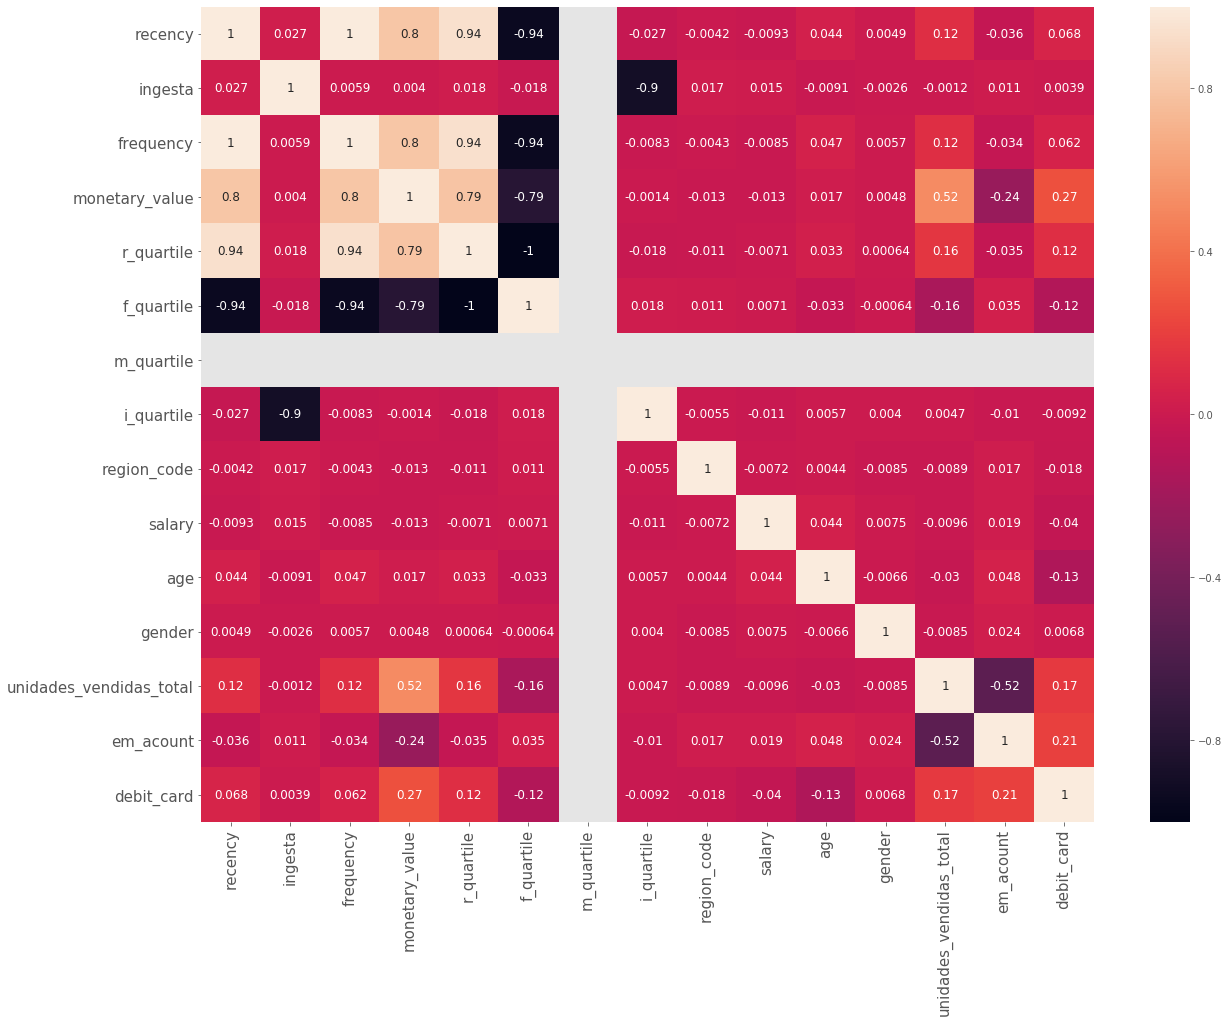

<Figure size 1152x1152 with 0 Axes>

In [75]:
corr = definitivo_10000clientes.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
plt.figure(figsize=(16,16))
fig.write_html('fig520MatrizCorr10000.html')

In [76]:
definitivo_10000clientes

,recency,ingesta,frequency,monetary_value,r_quartile,f_quartile,m_quartile,i_quartile,RFMScore,region_code,salary,age,gender,unidades_vendidas_total,em_acount,debit_card
pk_cid,,,,,,,,,,,,,,,,
1508806,185,0,7,1070.0,1,4,1,4,141,30.0,113652.32033,33.0,2.0,5.0,0.0,1.0
1250708,193,0,7,1030.0,1,4,1,4,141,47.0,113652.32033,31.0,2.0,5.0,0.0,1.0
1504109,195,0,7,920.0,1,4,1,4,141,9.0,113652.32033,44.0,2.0,5.0,0.0,1.0
1517456,161,0,6,910.0,1,4,1,4,141,28.0,113652.32033,37.0,2.0,5.0,0.0,1.0
1504140,195,0,7,900.0,1,4,1,4,141,28.0,113652.32033,48.0,2.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408550,312,0,11,630.0,4,1,1,4,411,28.0,182576.58000,21.0,1.0,3.0,0.0,0.0
1388709,434,0,15,630.0,4,1,1,4,411,18.0,95954.46000,84.0,2.0,2.0,1.0,0.0
1405270,324,0,11,630.0,4,1,1,4,411,8.0,132834.84000,28.0,1.0,3.0,0.0,0.0
